# Giới thiệu đồ án

Các dự án gọi vốn cộng đồng đang và sẽ phát triển rộng rãi trong thời gian gần đây. Rất nhiều dự án thành công từ hoạt động này, có thể kể đến các sản phẩm đã lan tỏa ra khắp thế giới như Exploding Kittens (board game), Hollow Knights (video game), ... Quá trình này là một mối quan hệ đôi bên cùng có lợi, người cần tiền để phát triển dự án sẽ nhận được vốn, người có tiền sẽ có kênh đầu tư tiềm năng, dòng tiền của xã hội được luân chuyển, kích thích hoạt động sản xuất, thúc đẩy những ý tưởng, phát minh mới, xã hội phát triển giàu đẹp.

Tuy nhiên, phía sau ánh đèn hào quang cũng có mặt tối của nó. Không phải dự án nào cũng thành công. Điều này là một vấn đề nhức nhối với các nhà đầu tư. Việc quản lý dòng tiền, điều phối nguồn vốn như thế nào là yếu tố quyết định đến thành công của nhà đầu tư.Ở góc độ của người gọi vốn, tuy lĩnh vực gọi vốn cộng đồng còn mới, nhưng không phải không có cạnh tranh, làm thế nào để thu hút vốn đầu tư, tạo nguồn lực để phát triển là vấn đề đau đầu của các nhà sáng lập hiện nay.

Và, từ trước đến nay, hai công việc này được thực hiện bằng **kinh nghiệm**. Thế nhưng, các nhà đầu tư vào các dự án cộng đồng thường là các nhà đầu tư cá nhân, không có nhiều kinh nghiệm. Quyết định của họ thường dựa trên cảm xúc nhiều hơn là các yếu tố kĩ thuật. Ở khía cạnh nhà sáng lập cũng không hơn, họ thường là những người làm kĩ thuật và thiếu kinh nghiệm trong các hoạt động tài chính kinh tế. Kĩ năng, hiểu biết của họ trong lĩnh vực này của họ thường góp nhặt, manh mún, thiếu hệ thống.

Đồ án này được tạo ra như một công cụ trợ giúp trong hoạt động gọi vốn cộng đồng, đặc biệt là trong lĩnh vực *công nghệ*. Thông qua công cụ này, các nhà sáng lập biết được đâu là những yếu tố kĩ thuật nào đem đến thành công cho hoạt động gọi vốn, giúp họ có sự chuẩn bị tốt trước và trong quá trình gọi vốn. Các nhà đầu tư có công cụ đánh giá các dự án, phân tích và lựa chọn dự án phù hợp.

# Hướng thực hiện
Sử dụng dữ liệu từ một trong những nền tảng gọi vốn cộng đồng lớn nhất thế giới là Kickstarter để đưa ra những phân tích, đánh giá và xây dựng mô hình phù hợp.

Trong đồ án này, chúng ta sẽ tập trung vào lĩnh vực **công nghệ**, là lĩnh vực gần gũi và đang trở nên phổ biến hiện nay.

# Thu thập dữ liệu

Quá trình thu thập dữ liệu được trình bày chi tiết trong tệp `KickstarterCrawl.ipynb`

# Khai phá dữ liệu

Trong phần này chúng ta sẽ tiến hành xử lý dữ liệu thô và đánh giá, nhận định về thị trường gọi vốn công nghệ cộng đồng.

In [1]:
# Import essential depencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import requests
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn.linear_model import LinearRegression, LogisticRegression

import pickle

%matplotlib inline

## Tổng quan về dữ liệu

In [2]:
df = pd.read_csv('raw_data.csv')
original_cols = df.columns
df.sample(5)

,Id,Name,Url,Goal,Pledged,Launch,End,Year,Comments,Updates,Faqs,Backers,Tiers,TierMin,TierMax,Status
1032,1031,New 2019 Goal: Learn to Create Your Website wi...,http://www.kickstarter.com/projects/970955193/...,$100,$6750,January 22nd,February 17th,2019,4,1,0,42,7,40,29,success
5973,5972,2013 FTC Team 7042 Robot,http://www.kickstarter.com/projects/robohamste...,$700,$227,November 12th,November 20th,2013,0,0,0,8,4,1,150,failed
2338,2337,Solar Powered VW Bus – Film Promotional Tour,http://www.kickstarter.com/projects/1416952072...,$30000,$1675,July 1st,August 30th,2016,0,0,0,20,9,10,5000,failed
6599,6598,ScanJig - Turn Your Smart Device Into A Portab...,http://www.kickstarter.com/projects/2020513325...,$12500,$1278,July 24th,August 28th,2012,3,6,2,50,4,19,66,failed
3477,3476,GlowGene - Create new lifeforms by cutting and...,http://www.kickstarter.com/projects/glowgene/g...,$1200,$15564,September 13th,November 12th,2015,71,9,5,70,5,1,265,success


Cấu trúc dữ liệu

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173 entries, 0 to 7172
Data columns (total 16 columns):
Id          7173 non-null int64
Name        7173 non-null object
Url         7173 non-null object
Goal        7173 non-null object
Pledged     7173 non-null object
Launch      7173 non-null object
End         7173 non-null object
Year        7173 non-null int64
Comments    7173 non-null object
Updates     7173 non-null int64
Faqs        7173 non-null int64
Backers     7173 non-null int64
Tiers       7173 non-null int64
TierMin     7173 non-null int64
TierMax     7173 non-null int64
Status      7173 non-null object
dtypes: int64(8), object(8)
memory usage: 896.8+ KB


Như vậy không có hiện tượng mất, thiếu dữ liệu

**Ý nghĩa các thuộc tính dữ liệu:**
- Id: Id của dự án. Ta thấy Id có giá trị trùng với index nên đây có thể là Id do người lấy dữ liệu tự đánh
- Name: Tên dự án
- Url: Đường dẫn đến dự án
- Goal: Số vốn mục tiêu kêu gọi (bao gồm đơn vị tiền tệ)
- Pledged: Số vốn nhận được (bao gồm đơn vị tiền tệ)
- Launch: Ngày bắt đầu gọi vốn
- End: Ngày kết thúc gọi vốn
- Year: Năm gọi vốn
- Comments: Số lượng bình luận
- Updates: Số lần cập nhật trạng thái dự án
- Faqs: Số câu hỏi trong mục FAQ (Frequent ask questions)
- Backers: Số nhà đầu tư
- Tiers: Số lượng gói đầu tư mà nhà sáng lập đưa ra
- TierMin: Gói đầu tư nhỏ nhất
- TierMax: Gói đầu tư lớn nhất
- Status: Trạng thái dự án

Thống kê dữ liệu trùng lặp

In [4]:
df.duplicated().sum()

0

Như vậy, có thể thấy quá trình lấy dữ liệu được thực hiện tốt. Không có dữ liệu mất hay trùng lặp.

---
Bây giờ, sau khi đã biết trong dữ liệu có gì, chúng ta sẽ tiến hành khai thác dữ liệu.

## Phân tích dữ liệu

### Đặt giả thuyết
Trước khi bắt đầu, chúng ta sẽ tiến hành đặt ra các giả thuyết về dữ liệu. Đây là một cách rất hiệu quả để đưa ra được một góc nhìn cụ thể cho vấn đề mà chúng ta muốn giải quyết. 

Ở đây, vì chúng ta muốn tìm ra công thức cho sự thành công nên các giả thuyết của chúng ta sẽ xoay quanh vấn đề này. Các giả thuyết có thể có là:
- Kêu gọi số vốn quá lớn sẽ làm giảm khả năng thành công của dự án
- Bắt đầu gọi vốn vào ngày nghỉ sẽ giúp tăng khả năng thành công.
- Khoảng thời gian gọi vốn càng ngắn thì dự án càng nhận được ít tiền đầu tư
- Cập nhật trạng thái liên tục sẽ giúp các nhà đầu tư tin tưởng đầu tư vào dự án
- Đưa ra các câu trả lời cho FAQ giúp tăng độ tin cậy cũng như nguồn tiền đổ vào dự án
- Đặt ra càng nhiều gói đầu tư thì khả năng gọi vốn thành công càng cao
- ...

Bên cạnh đó, trong quá trình phân tích và khám phá dữ liệu. Chúng ta sẽ tiếp tục đặt ra các giả thuyết mới.

### Phân tích dữ liệu

Ta sẽ bắt đầu với cột `status`. Đây là cột mục tiêu, là nhãn của bộ dữ liệu. Hiểu được cột này sẽ cho chúng ta có cái nhìn chính xác về vấn đề kinh tế đặt ra.

failed     5092
success    2081
Name: Status, dtype: int64


<AxesSubplot:ylabel='Status'>

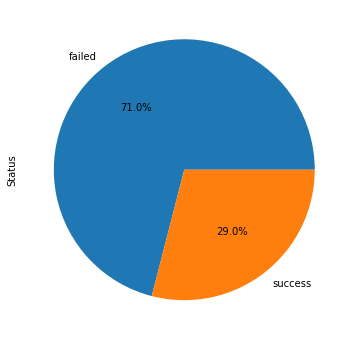

In [5]:
status_value_counts = df['Status'].value_counts()
print(status_value_counts)
status_value_counts.plot.pie(autopct="%.1f%%", figsize=[10,6])

Ta nhận thấy có phần lớn dự án gọi vốn thất bại. Cho thấy mức độ khó khăn của hoạt động gọi vốn cộng đồng nói riêng, gọi vốn đầu tư nói chung khó khăn như thế nào.

---

Ta sẽ tiếp tục phân tích cột `Name`. Giống như trong lĩnh vực báo chí, tiêu đề hay, thu hút có thể thu hút một lượng lớn người đọc. Ta hoàn toàn có thể đặt ra giả thuyết rằng cách đặt tên dự án cũng sẽ ảnh hưởng thu hút được vốn đầu tư.

Trong khuôn khổ đồ án, chúng ta sẽ bỏ qua các kĩ thuật xử lý ngôn ngữ phức tạp. Nhưng chúng ta vẫn sẽ chiết tách hai thuộc tính mới cho cột `Name` là độ dài và số từ sử dụng.

In [6]:
def count_words(s: str) -> int:
    return len(s.strip().split(' '))

df['NameLength'] = df['Name'].apply(len)
df['NameWords'] = df['Name'].apply(count_words)
df.sample(5)[['Id', 'Name', 'NameLength', 'NameWords', 'Status']]

,Id,Name,NameLength,NameWords,Status
6066,6065,Project BEESWAX,15,2,failed
6051,6050,Homebrew Computer Club Reunion,30,4,success
6092,6091,Tuit,4,1,failed
4999,4998,Link & Think Alike,18,4,failed
2822,2821,SACS,4,1,failed


<AxesSubplot:xlabel='NameWords', ylabel='Frequency'>

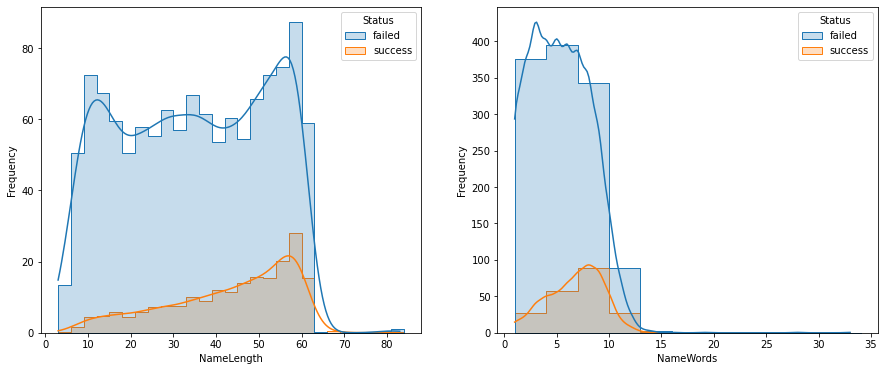

In [7]:
plt.subplots(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df, x='NameLength', hue='Status', binwidth=3, kde=True, element='step', stat='frequency')
plt.subplot(1, 2, 2)
sns.histplot(df, x='NameWords', hue='Status', binwidth=3, kde=True, element='step', stat='frequency')

Dựa vào đồ thị, ta thấy độ dài tên các dự án thất bại phân bố trải dài tương đối đều (có dấu hiệu trũng ở giữa, cao hơn ở hai phía). Trong khi các dự án thành công thì tăng dần. Từ đó tỉ lệ thành công / thất bại theo độ dài tên cũng tăng dần độ dài tên tăng.

Để tiện tính toán, xử lý. Từ giờ chúng ta sẽ quy định `success` là 1 và `failed` là 0

In [8]:
df['StatusEncoded'] = df['Status'].replace(['success', 'failed'], [1, 0])
df['StatusEncoded'] = df['StatusEncoded'].astype(int)

---

Cột `Url` là đường dẫn, có thể tạo lại bằng tên của dự án nên ta sẽ bỏ qua.

In [9]:
df['Url'].sample(5)

37      http://www.kickstarter.com/projects/1274743409...
6579    http://www.kickstarter.com/projects/andersjj/s...
6504    http://www.kickstarter.com/projects/585102285/...
7122    http://www.kickstarter.com/projects/replaymy/r...
5327    http://www.kickstarter.com/projects/72058638/g...
Name: Url, dtype: object

---

Đối với cột `Goal` và cột `Pledged`, chúng ta thấy dữ liệu bao gồm cả đơn vị tiền tệ. Điều này gây khó khăn cho phân tích và xử lý các dữ liệu số.

Bên cạnh đó đơn vị tiền tệ cũng là một thuộc tính có thể mang thông tin hữu ích. Nó cho thấy phần nào tình hình thị trường vốn của các quốc gia. Một giả thuyết có thể được đặt ra là liệu có đồng tiền nào được ưa chuộng hơn trong đầu tư.

Do đó, chúng ta sẽ tách các thông tin về số và tiền tệ ra thành các thuộc tính khác nhau.

In [10]:
def currency_split(s: str) -> int:
    i = 0
    while not s[i].isnumeric():
        i += 1        
    return i

df['Currency'] = df['Goal'].apply(lambda x: x[:currency_split(x)])
df['GoalValue'] = df['Goal'].apply(lambda x: x[currency_split(x):]).astype(int)
df['PledgedValue'] = df['Pledged'].apply(lambda x: x[currency_split(x):]).astype(int)

In [11]:
df['Currency'].value_counts()

$      5621
€       724
£       594
HK$      89
kr       76
MX$      54
¥         6
â‚¬       5
Â£        4
Name: Currency, dtype: int64

Trong danh sách này, có hai kí hiệu tiền tệ lạ là `â‚¬` và `Â£`. Chúng ta sẽ kiểm tra các dự án sử dụng loại tiền tệ này.

In [12]:
df[(df['Currency'] == 'Â£')|(df['Currency'] == 'â‚¬')]['Url']

942     http://www.kickstarter.com/projects/roseprj/is...
943     http://www.kickstarter.com/projects/2131326048...
946     http://www.kickstarter.com/projects/smart-ivy/...
949     http://www.kickstarter.com/projects/ramoncaraz...
950     http://www.kickstarter.com/projects/hyperloopu...
1243    http://www.kickstarter.com/projects/1140759607...
1246    http://www.kickstarter.com/projects/1206849453...
1249    http://www.kickstarter.com/projects/583173617/...
1250    http://www.kickstarter.com/projects/12283819/q...
Name: Url, dtype: object

Tất cả các trang đều lỗi. Như vậy, các loại tiền tệ này là lỗi trong quá trình lấy dữ liệu. Và số lượng của chúng cũng rất nhỏ trên toản bộ tập dữ liệu. 
Chúng ta sẽ xóa bỏ các dòng có dữ liệu lỗi đi. Sau đó, đổi các loại tiền tệ còn lại sang dạng tên viết tắt.

In [13]:
df = df[(df['Currency'] != 'Â£')&(df['Currency'] != 'â‚¬')]

frequent_currency_symbol = ['$', '€', '£', 'HK$', 'MX$', 'kr', '¥']
frequent_currency_code = ['USD', 'EUR', 'GBP', 'HKD', 'MXN', 'SEK', 'JPY']
df['CurrencyName'] = df['Currency'].replace(frequent_currency_symbol, frequent_currency_code)
df['CurrencyName'].value_counts()

USD    5621
EUR     724
GBP     594
HKD      89
SEK      76
MXN      54
JPY       6
Name: CurrencyName, dtype: int64

<AxesSubplot:xlabel='CurrencyName', ylabel='count'>

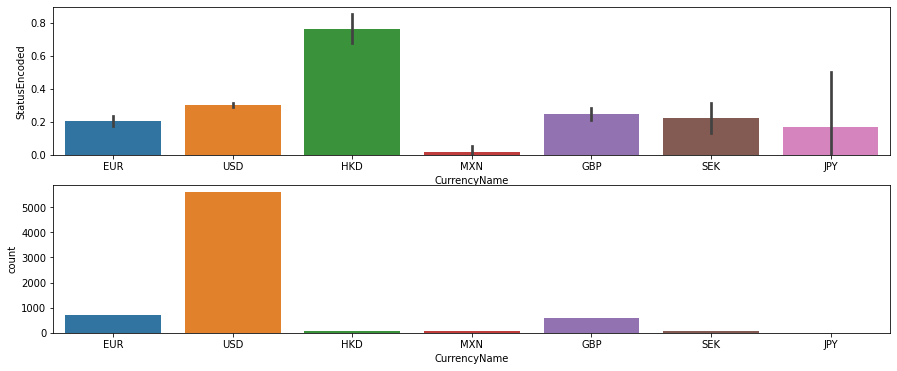

In [14]:
plt.subplots(figsize=(15, 6))
plt.subplot(2, 1, 1)
sns.barplot(x='CurrencyName', y='StatusEncoded', data=df)
plt.subplot(2, 1, 2)
sns.countplot(x='CurrencyName', data=df)

Ở đây ta thấy, các đồng tiền khác nhau có khả năng khác nhau trong việc thu hút vốn. Ví dụ như đồng `HKD` có tỉ lệ gọi vốn thành công bằng đồng tiền này rất cao, chứng tỏ thị trường vốn ở Hồng Kông rất sôi động, nhưng các lựa chọn đầu tư cộng đồng còn chưa đa dạng.

---

Để chuẩn hóa dữ liệu, tiện cho việc so sánh. Chúng ta sẽ tất cả các con số gọi vốn và đầu tư về cùng một đơn vị tiền tệ. Vì `USD` là đồng tiền thanh toán quốc tế và số lượng mẫu sử dụng `USD` chiếm đa số, nên chúng ta sẽ sử dụng đồng tiền này làm thước đo.

In [15]:
api = 'https://api.exchangeratesapi.io/latest?base={}&symbols=USD'

exchanger_dict = dict()

def get_exchange_rate_USD(currency: str) -> float:
    if currency in exchanger_dict:
        return exchanger_dict[currency]
    else:
        req = requests.get(api.format(currency))
        json = req.json()
        rate = json['rates']['USD']
        exchanger_dict[currency] = rate
        return rate

def exchange_USD(x, currency) -> float:
    return x * get_exchange_rate_USD(currency)

In [16]:
exchange_rate_vector = df['CurrencyName'].apply(get_exchange_rate_USD)
df['GoalUSD'] = df['GoalValue'] * exchange_rate_vector
df['PledgedUSD'] = df['PledgedValue'] * exchange_rate_vector

print(exchanger_dict)
df.sample(5)

{'EUR': 1.2123, 'USD': 1.0, 'HKD': 0.1289718632, 'MXN': 0.0504639285, 'GBP': 1.3631202006, 'SEK': 0.1199695228, 'JPY': 0.0096062119}


,Id,Name,Url,Goal,Pledged,Launch,End,Year,Comments,Updates,...,Status,NameLength,NameWords,StatusEncoded,Currency,GoalValue,PledgedValue,CurrencyName,GoalUSD,PledgedUSD
1459,1458,Electric Eel Wheel Mini,http://www.kickstarter.com/projects/1492884446...,$2500,$85353,November 27th,December 29th,2017,104,15,...,success,23,4,1,$,2500,85353,USD,2500.0000,85353.000000
3049,3048,SPANIARDS BLOG,http://www.kickstarter.com/projects/1342424510...,€5000,€0,November 18th,December 28th,2015,0,0,...,failed,14,2,0,€,5000,0,EUR,6061.5000,0.000000
5961,5960,Launch Santa Fe High School's Rocket Club!,http://www.kickstarter.com/projects/220377204/...,$2500,$2579,November 18th,December 18th,2013,0,14,...,success,42,7,1,$,2500,2579,USD,2500.0000,2579.000000
6689,6688,THE KING PONG PROJECT: Crowdsourcing iPhone Ap...,http://www.kickstarter.com/projects/1412246023...,$35000,$857,May 16th,June 19th,2012,2,0,...,failed,59,8,0,$,35000,857,USD,35000.0000,857.000000
414,413,Stick: Learning That Sticks,http://www.kickstarter.com/projects/make-it-st...,kr500000,kr6013,February 26th,March 27th,2020,2,0,...,failed,27,4,0,kr,500000,6013,SEK,59984.7614,721.376741


Bây giờ chúng ta sẽ xem xét sự liên hệ giữa `Goal` và `Status`.

Median of success goal:  10000.0
Median of failed goal:   25000.0


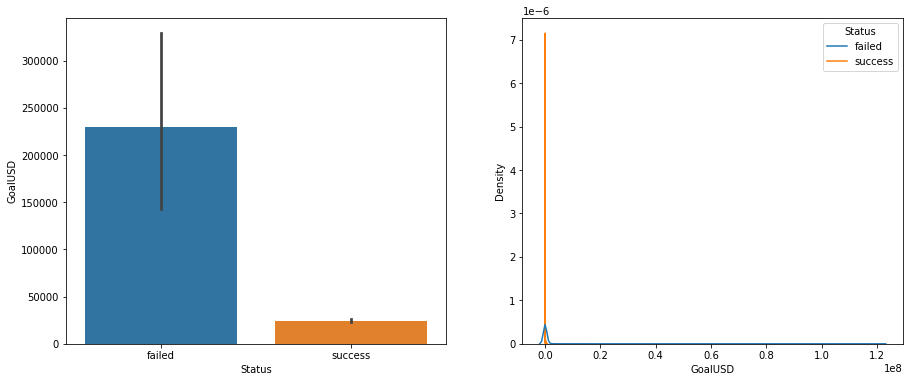

In [17]:
plt.subplots(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.barplot(x='Status', y='GoalUSD', data=df)
plt.subplot(1, 2, 2)
sns.kdeplot(x='GoalUSD', hue='Status', data=df)

print('Median of success goal: ', df[df['StatusEncoded'] == 1]['GoalUSD'].median())
print('Median of failed goal:  ', df[df['StatusEncoded'] == 0]['GoalUSD'].median())
plt.show()

Như chúng ta thấy, con số kêu gọi rất quan trọng trong mô hình. Các dự án thành công đều có mức kêu gọi phân bố trong khoảng thấp. Trung bình khoảng vốn kêu gọi của các dự án thành công thấp hơn rất nhiều so với các dự án thất bại.

Chúng ta sẽ bỏ qua cột `Pledged` ở đây. Vì đơn giản là cột `Pledged` có thể suy ra trực tiếp kết quả.

---

Ngày bắt đầu và ngày kết thúc cũng có thể cho chúng ta những thông tin hữu ích về bộ dữ liệu. Đầu tiên chúng ta sẽ kiểm tra mối tương quan giữa khoảng thời gian gọi vốn và kết quả gọi vốn. Bên cạnh đó, chúng ta cũng kiểm tra giả thuyết liệu bắt đầu gọi vốn vào ngày cuối tuần có ảnh hưởng đến kết quả không.

In [18]:
def str_to_datetime(s: str) -> datetime:
    return datetime.strptime(s, '%B %d,%Y')
    
durations = []
weekdays = []
for launch_date_str, end_date_str, year in zip(df['Launch'], df['End'], df['Year']):
    launch_dt = str_to_datetime(''.join([launch_date_str[:-2], ',', str(year)]))
    end_dt = str_to_datetime(''.join([end_date_str[:-2], ',', str(year)]))
    
    weekdays.append(launch_dt.weekday())
    
    duration = end_dt - launch_dt
    durations.append(duration.total_seconds() / (3600 * 24))

# durations
df['Days'] = durations
df.loc[df['Days'] <= 0,'Days'] = df[df['Days'] <= 0]['Days'] + 365
df['Weekday'] = weekdays
df.sample(5)[['Launch', 'End', 'Year', 'Days', 'Weekday', 'Status']]

,Launch,End,Year,Days,Weekday,Status
6101,September 17th,October 17th,2013,30.0,1,failed
2191,August 23rd,October 22nd,2016,60.0,1,success
5505,May 4th,June 3rd,2014,30.0,6,failed
1073,December 6th,January 24th,2019,49.0,4,success
4357,March 4th,April 3rd,2015,30.0,2,failed


<AxesSubplot:xlabel='Days', ylabel='Density'>

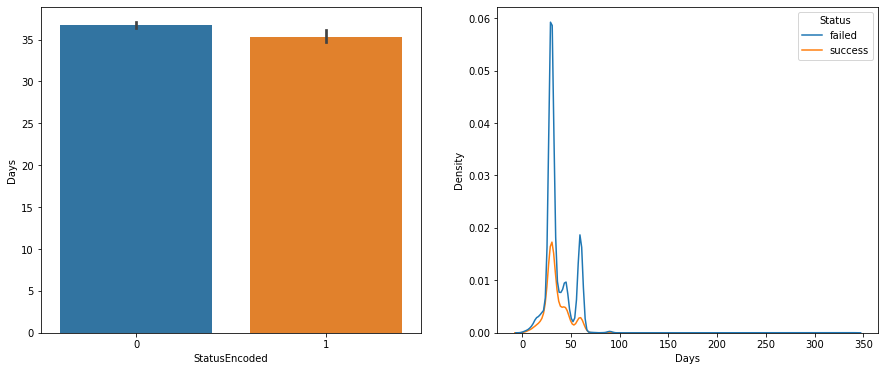

In [19]:
plt.subplots(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.barplot(x='StatusEncoded', y='Days', data=df)
plt.subplot(1, 2, 2)
sns.kdeplot(x='Days', hue='Status', data=df)

<AxesSubplot:xlabel='Weekday', ylabel='count'>

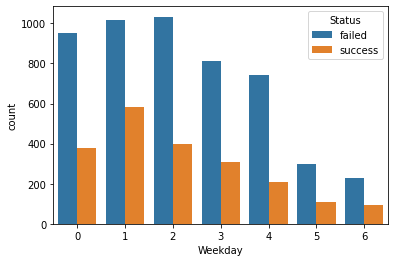

In [20]:
sns.countplot(x='Weekday', hue='Status', data=df)

Dựa vào biểu đồ, chúng ta thấy các thông tin về ngày tháng không cho dấu hiệu "quá" rõ ràng về mối quan hệ với khả năng thành công của dự án gọi vốn.

---

Tiếp theo, chúng ta sẽ lần lượt kiểm tra mối tương quan giữa số lượng bình luận, số lượng FAQ, số lần cập nhật, số nhà đầu tư. đối với kết quả gọi vốn.

Trước hết, chúng ta nhận thấy có một cột không chứa dữ liệu số là cột `Comments`. Lí do là khi các con số lớn hơn 1000, dữ liệu sẽ có dấu `,`. Chúng ta cần bỏ dấu `,` đi và chuyển sang dạng số.

In [21]:
df['Comments'] = df['Comments'].apply(lambda x : x.replace(',', '')).astype(int)

<AxesSubplot:xlabel='Comments', ylabel='Density'>

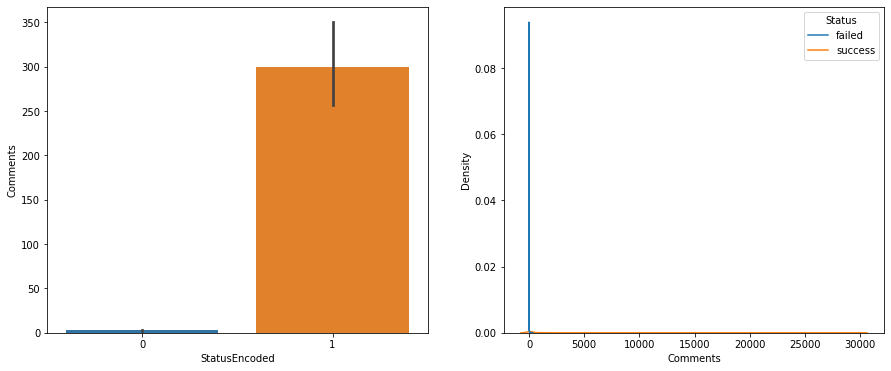

In [22]:
plt.subplots(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.barplot(x='StatusEncoded', y='Comments', data=df)
plt.subplot(1, 2, 2)
sns.kdeplot(x='Comments', hue='Status', data=df)

<AxesSubplot:xlabel='Updates', ylabel='Density'>

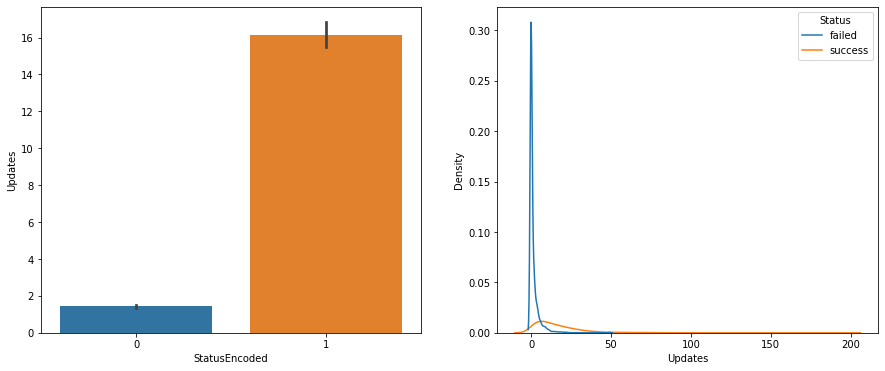

In [23]:
plt.subplots(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.barplot(x='StatusEncoded', y='Updates', data=df)
plt.subplot(1, 2, 2)
sns.kdeplot(x='Updates', hue='Status', data=df)

<AxesSubplot:xlabel='Backers', ylabel='Density'>

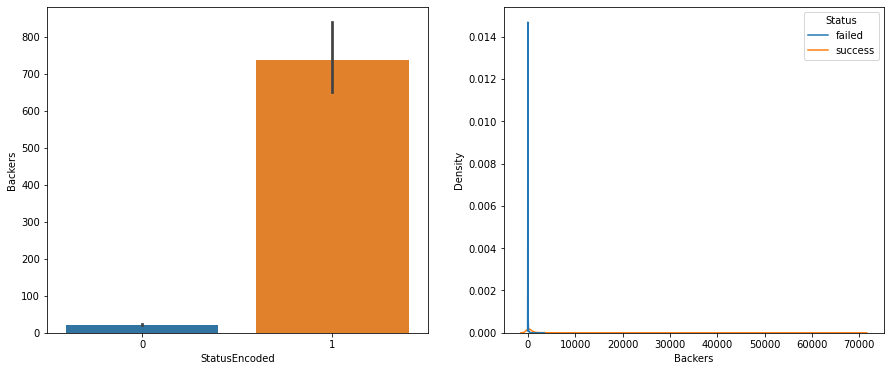

In [24]:
plt.subplots(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.barplot(x='StatusEncoded', y='Backers', data=df)
plt.subplot(1, 2, 2)
sns.kdeplot(x='Backers', hue='Status', data=df)

<AxesSubplot:xlabel='Faqs', ylabel='Density'>

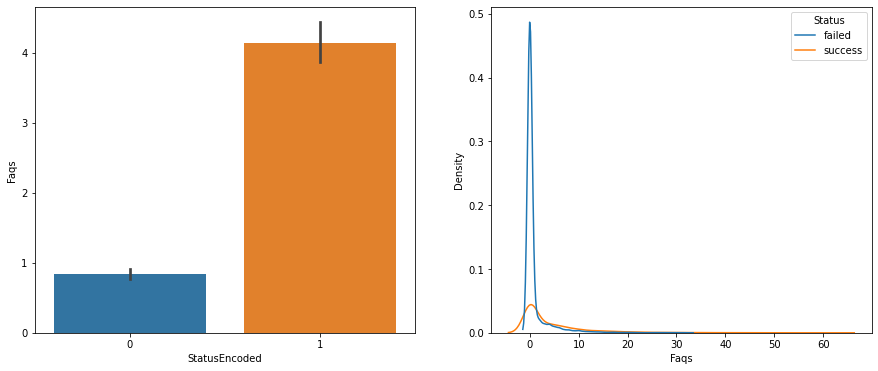

In [25]:
plt.subplots(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.barplot(x='StatusEncoded', y='Faqs', data=df)
plt.subplot(1, 2, 2)
sns.kdeplot(x='Faqs', hue='Status', data=df)

Như chúng ta đã thấy, đối với các con số này, số càng lớn thì tỉ lệ thành công càng cao. Trong khi phân phối của các số này của các dữ liệu thất bại có đỉnh gần như bằng không thì ở bên phía thành công, đỉnh nằm ở vị trí xa 0 và sườn dốc phân phối khá thoải.

---

Bây giờ chúng ta sẽ xem xét giả thuyết liệu cách thiết lập các gói đầu tư có ảnh hưởng đến kết quả gọi vốn hay không.

<AxesSubplot:xlabel='Tiers', ylabel='Frequency'>

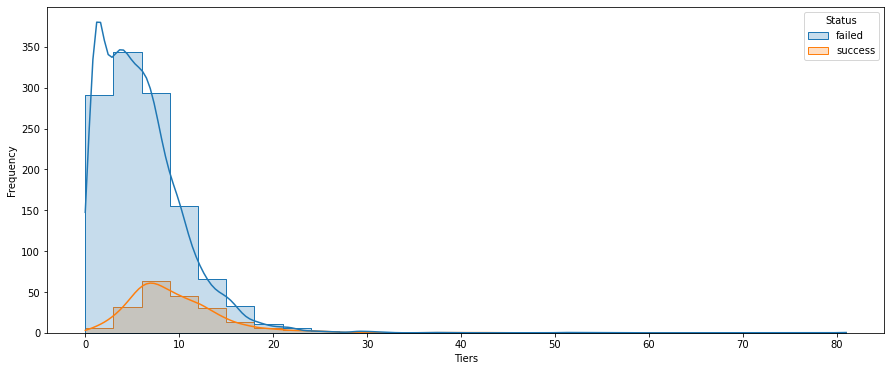

In [26]:
plt.subplots(figsize=(15,6))
sns.histplot(df, x='Tiers', hue='Status', binwidth=3, kde=True, element='step', stat='frequency')

Dựa vào phân phối ở trên, chúng ta thấy có một vài điểm dữ liệu ở ngoại biên làm ảnh hưởng đến khả năng đánh giá. Thay vì cắt bọ chúng, chúng ta sẽ giới hạn chúng ở một giá trị nhất định (ở đây là 25)

<AxesSubplot:xlabel='Tiers', ylabel='Frequency'>

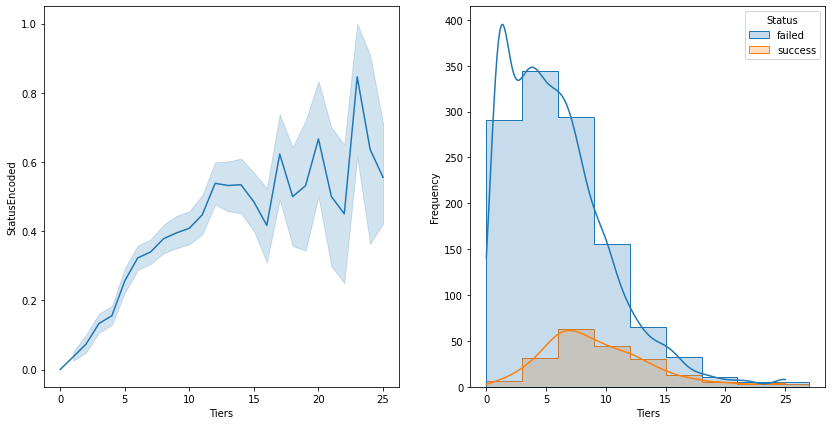

In [27]:
df.loc[df['Tiers'] > 25, 'Tiers'] = 25

plt.subplots(figsize=(14,7))
plt.subplot(1, 2, 1)
sns.lineplot(x='Tiers', y='StatusEncoded', data=df)
plt.subplot(1, 2, 2)
sns.histplot(df, x='Tiers', hue='Status', binwidth=3, kde=True, element='step', stat='frequency')

Với biểu đồ trên, chúng ta nhận thấy khi xây dựng đa dạng gói đầu tư, kết quả gọi vốn đã có thể tăng đáng.

<AxesSubplot:xlabel='TierMax', ylabel='Density'>

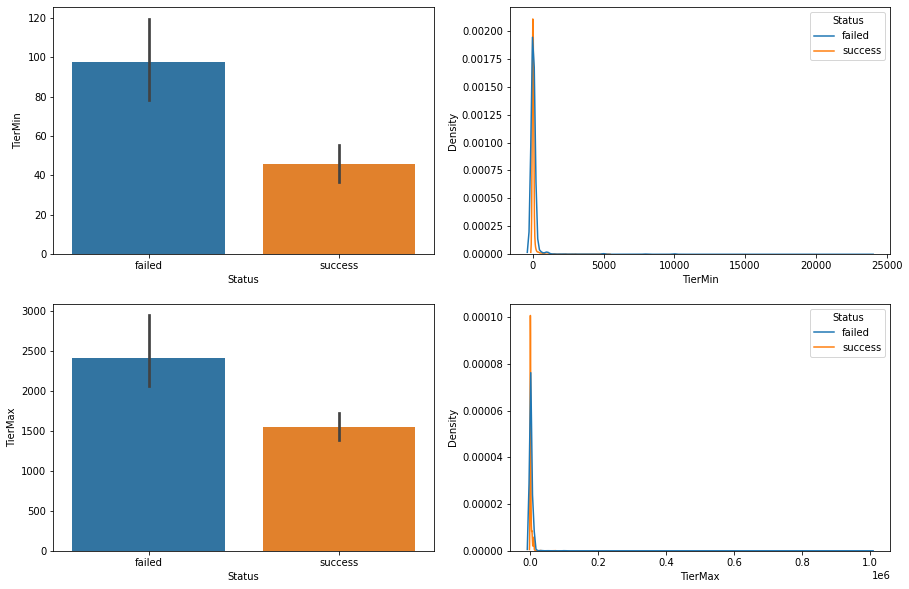

In [28]:
plt.subplots(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.barplot(x='Status', y='TierMin', data=df)
plt.subplot(2, 2, 2)
sns.kdeplot(x='TierMin', hue='Status', data=df)
plt.subplot(2, 2, 3)
sns.barplot(x='Status', y='TierMax', data=df)
plt.subplot(2, 2, 4)
sns.kdeplot(x='TierMax', hue='Status', data=df)

Với dữ liệu về gói đầu tư tối đa và gói đầu tư tối thiểu, có thể thấy có mối quan hệ với kết quả gọi vốn. Tuy nhiên sự liên hệ này có thể giải thích thông qua mục tiêu gọi vốn (`Goal`). Bởi lẽ, mục tiêu càng cao thì giá trị các gói đầu tư cũng lớn theo tương ứng.

---

Chúng ta sẽ lưu lại bộ dữ liệu đã khai phá vào file `exploration_data.csv` và lưu các cột của dữ liệu thô (chúng ta hoàn toàn không chỉnh sửa gì ở các cột này mà luôn tạo cột mới, chúng ta chỉ xóa các dữ liệu lỗi do quá trình lấy dữ liệu) vào file `clean_data.csv`

In [29]:
df.to_csv('exploration_data.csv', index=None)
df[original_cols].to_csv('clean_data.csv', index=None)

# Xây dựng model

## Tiền xử lý dữ liệu

Dựa vào kết quả khai phá dữ liệu ở trên, chúng ta sẽ tiến hành tiền xử lý dữ liệu.

Đầu tiên, ta đọc dữ liệu thô đã được làm sạch (chỉ xóa các dòng lỗi do lấy dữ liệu, không thêm hay thay đổi gì)

In [30]:
df = pd.read_csv('clean_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7164 entries, 0 to 7163
Data columns (total 16 columns):
Id          7164 non-null int64
Name        7164 non-null object
Url         7164 non-null object
Goal        7164 non-null object
Pledged     7164 non-null object
Launch      7164 non-null object
End         7164 non-null object
Year        7164 non-null int64
Comments    7164 non-null int64
Updates     7164 non-null int64
Faqs        7164 non-null int64
Backers     7164 non-null int64
Tiers       7164 non-null int64
TierMin     7164 non-null int64
TierMax     7164 non-null int64
Status      7164 non-null object
dtypes: int64(9), object(7)
memory usage: 895.6+ KB


Bây giờ chúng ta tách dữ liệu thành hai bộ huấn luyện (*train*) và thẩm định (*validation*). Mỗi bộ gồm có dữ liệu đầu vào và đầu ra. Chúng ta cũng sẽ mã hóa cột kết quá sang dạng 0 và 1 để thuận tiện về sau.

In [31]:
X = df.drop('Status', axis=1)
y = df['Status'].replace(['success', 'failed'], [1, 0])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=29031996)
print('Train data:', X_train.shape, y_train.shape)
print('Test data:', X_val.shape, y_val.shape)

Train data: (5014, 15) (5014,)
Test data: (2150, 15) (2150,)


Bây giờ chúng ta sẽ bắt đầu tiền xử lý

---

Đầu tiên, chúng ta sẽ thêm vào các cột mà chúng ta đã phân tích ở trên.

In [32]:
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X_df, y=None):
        return self
    
    def transform(self, X_df, y=None):
        X_df = X_df.copy()
        X_df['NameLength'] = X_df['Name'].apply(len)
        X_df['NameWords'] = X_df['Name'].apply(count_words)
        
        X_df['Currency'] = X_df['Goal'].apply(lambda x: x[:currency_split(x)])
        X_df['GoalValue'] = X_df['Goal'].apply(lambda x: x[currency_split(x):]).astype(int)
        X_df['PledgedValue'] = X_df['Pledged'].apply(lambda x: x[currency_split(x):]).astype(int)
        X_df['CurrencyName'] = X_df['Currency'].replace(frequent_currency_symbol, frequent_currency_code)
        exchange_rate_vector = X_df['CurrencyName'].apply(get_exchange_rate_USD)
        X_df['GoalUSD'] = X_df['GoalValue'] * exchange_rate_vector
        X_df['PledgedUSD'] = X_df['PledgedValue'] * exchange_rate_vector

        return X_df
        
temp_df = FeatureEngineer().fit_transform(X)
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7164 entries, 0 to 7163
Data columns (total 23 columns):
Id              7164 non-null int64
Name            7164 non-null object
Url             7164 non-null object
Goal            7164 non-null object
Pledged         7164 non-null object
Launch          7164 non-null object
End             7164 non-null object
Year            7164 non-null int64
Comments        7164 non-null int64
Updates         7164 non-null int64
Faqs            7164 non-null int64
Backers         7164 non-null int64
Tiers           7164 non-null int64
TierMin         7164 non-null int64
TierMax         7164 non-null int64
NameLength      7164 non-null int64
NameWords       7164 non-null int64
Currency        7164 non-null object
GoalValue       7164 non-null int32
PledgedValue    7164 non-null int32
CurrencyName    7164 non-null object
GoalUSD         7164 non-null float64
PledgedUSD      7164 non-null float64
dtypes: float64(2), int32(2), int64(11), object(8)
me

Bây giờ chúng ta sẽ loại bỏ các cột mà chúng ta đã phân tích là không cần dùng đến.

In [33]:
unused_columns = ['Id', 'Name', 'Url', 'Goal', 'Pledged', 'Launch', 'End', 'Year', 'TierMin', 'TierMax', 
                  'Currency', 'GoalValue', 'PledgedValue', 'CurrencyName', 'PledgedUSD']
class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_titles=1):
        self.num_top_titles = num_top_titles
    def fit(self, X_df, y=None):
        return self
    def transform(self, X_df, y=None):
        return X_df.drop(unused_columns, axis=1)
    
temp_df = ColumnDropper().fit_transform(temp_df)
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7164 entries, 0 to 7163
Data columns (total 8 columns):
Comments      7164 non-null int64
Updates       7164 non-null int64
Faqs          7164 non-null int64
Backers       7164 non-null int64
Tiers         7164 non-null int64
NameLength    7164 non-null int64
NameWords     7164 non-null int64
GoalUSD       7164 non-null float64
dtypes: float64(1), int64(7)
memory usage: 447.9 KB


Bây giờ chúng ta sẽ tiến hành đặt ngưỡng cho cho các dữ liệu số có đuôi phân bố dài giống như cách chúng ta làm với `Tiers` ở trên. Chúng ta sẽ lấy ngưỡng là quantile 95% (Ngưỡng 95% dữ liệu)

In [34]:
class ValueLimiter(BaseEstimator, TransformerMixin):
    def __init__(self, rate=0.95):
        self.rate = rate
    def fit(self, X_df, y=None):
        self.comments_quantile = X_df['Comments'].quantile(self.rate)
        self.updates_quantile = X_df['Updates'].quantile(self.rate)
        self.faqs_quantile = X_df['Faqs'].quantile(self.rate)
        self.backers_quantile = X_df['Backers'].quantile(self.rate)
        self.tiers_quantile = X_df['Tiers'].quantile(self.rate)
        self.goals_quantile = X_df['GoalUSD'].quantile(self.rate)
        return self
    def transform(self, X_df, y=None):
        X_df = X_df.copy()
        X_df.loc[X_df['Comments']>self.comments_quantile, 'Comments'] = self.comments_quantile
        X_df.loc[X_df['Updates']>self.comments_quantile, 'Updates'] = self.updates_quantile
        X_df.loc[X_df['Faqs']>self.comments_quantile, 'Faqs'] = self.faqs_quantile
        X_df.loc[X_df['Backers']>self.comments_quantile, 'Backers'] = self.backers_quantile
        X_df.loc[X_df['Tiers']>self.comments_quantile, 'Tiers'] = self.tiers_quantile
        X_df.loc[X_df['GoalUSD']>self.comments_quantile, 'GoalUSD'] = self.goals_quantile
        return X_df
    
temp_df = ValueLimiter().fit_transform(temp_df)
temp_df.head()

,Comments,Updates,Faqs,Backers,Tiers,NameLength,NameWords,GoalUSD
0,12.0,4.0,4.0,19.0,10.0,55,12,250000.0
1,6.0,1.0,1.0,15.0,9.0,9,1,250000.0
2,0.0,0.0,0.0,6.0,2.0,59,8,250000.0
3,0.0,0.0,0.0,1.0,3.0,33,5,250000.0
4,2.0,0.0,0.0,22.0,8.0,29,4,250000.0


Điều thú vị là các cột của chúng ta đều ở dạng số. Chúng ta sẽ căn chỉnh (scale) dữ liệu lại để tăng tốc mô hình.

In [35]:
temp_df = StandardScaler().fit_transform(temp_df)
temp_df[:5]

array([[-0.26097167, -0.15330276,  0.48909764, -0.40536223,  0.66244379,
         1.0703968 ,  2.18037576,  0.13162303],
       [-0.32772089, -0.42407716, -0.17573611, -0.41827481,  0.44807269,
        -1.67233583, -1.66748404,  0.13162303],
       [-0.39447011, -0.5143353 , -0.39734737, -0.44732813, -1.05252497,
         1.3088953 ,  0.78115402,  0.13162303],
       [-0.39447011, -0.5143353 , -0.39734737, -0.46346886, -0.83815387,
        -0.24134489, -0.26826229,  0.13162303],
       [-0.37222037, -0.5143353 , -0.39734737, -0.39567779,  0.2337016 ,
        -0.47984338, -0.61806773,  0.13162303]])

Bây giờ chúng ta sẽ kết hợp các bước tiền xử lý vào một pipeline để tái sử dụng về sau

In [36]:
preprocess_pipeline = make_pipeline(FeatureEngineer(), ColumnDropper(), ValueLimiter(), StandardScaler())
preprocess_pipeline

Pipeline(steps=[('featureengineer', FeatureEngineer()),
                ('columndropper', ColumnDropper()),
                ('valuelimiter', ValueLimiter()),
                ('standardscaler', StandardScaler())])

## Xây dựng mô hình

Ta sẽ tiến hành xây dựng nhiều mô hình khác nhau.

Thoạt nhìn, các biến đều là số nên chúng ta cảm thấy dữ liệu rất phù hợp cho mô hình KNN.

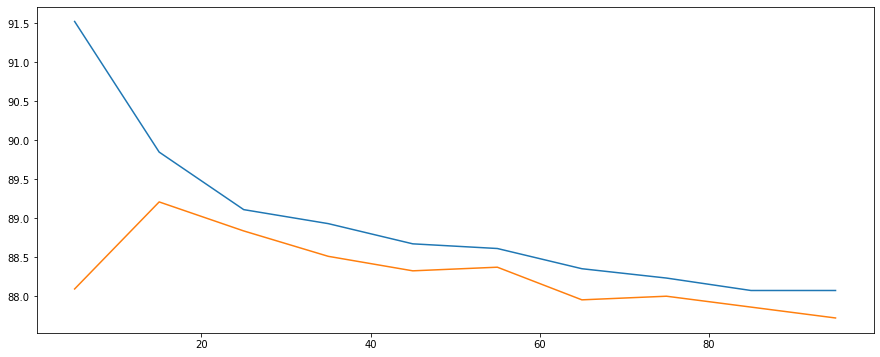

In [37]:
full_pipeline = make_pipeline(preprocess_pipeline, KNeighborsClassifier())

neighbors = list(range(5, 100, 10))
train_scores = []
val_scores = []
for n in neighbors:
    full_pipeline.set_params(kneighborsclassifier__n_neighbors = n)
    full_pipeline.fit(X_train, y_train)
    pred_train = full_pipeline.predict(X_train)
    pred_val = full_pipeline.predict(X_val)
    train_scr = (1 - zero_one_loss(y_train, pred_train)) * 100 ; train_scores.append(train_scr)
    val_scr = (1 - zero_one_loss(y_val, pred_val)) * 100 ; val_scores.append(val_scr)

plt.subplots(figsize=(15, 6))
sns.lineplot(x=neighbors, y=train_scores)
sns.lineplot(x=neighbors, y=val_scores)
plt.show()

Chúng ta nhận thấy có rất nhiều giá trị có quan hệ tuyến tính với kết quả. Chúng ta sẽ thử mô hình hồi quy tuyến tính.

Train scores:       88.87116074990028
Validation scores:  88.04651162790698


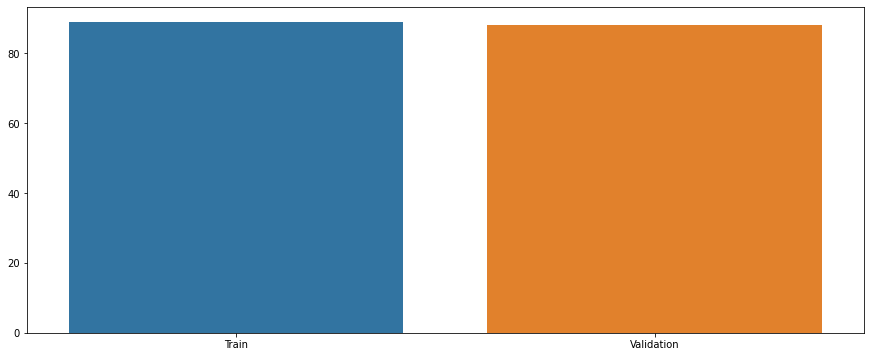

In [38]:
full_pipeline = make_pipeline(preprocess_pipeline, LogisticRegression())

full_pipeline.fit(X_train, y_train)
pred_train = full_pipeline.predict(X_train)
pred_val = full_pipeline.predict(X_val)
train_scr = (1 - zero_one_loss(y_train, pred_train)) * 100
val_scr = (1 - zero_one_loss(y_val, pred_val)) * 100

print('Train scores:      ', train_scr)
print('Validation scores: ', val_scr)
plt.subplots(figsize=(15, 6))
sns.barplot(x=['Train', 'Validation'], y=[train_scr, val_scr])
plt.show()

Mô hình hồi quy tuyến ính cho hiệu quả tốt.

Bây giờ chúng ta sẽ thử nghiệm trên một mô hình phi tuyến là MLP

In [39]:
full_pipeline = make_pipeline(preprocess_pipeline, 
                              MLPClassifier(hidden_layer_sizes=(16), solver='lbfgs', random_state=0, max_iter=5000))

# Thử nghiệm với các giá trị khác nhau của các siêu tham số
# và chọn ra các giá trị tốt nhất
train_scores = []
val_scores = []
alphas = [0.1, 1, 10, 100, 1000]
activators = ['identity', 'relu', 'logistic', 'tanh']
best_val_scr = -float('inf')
best_alpha = None
best_activator = None

for alpha in alphas:
    for activator in activators:
        full_pipeline.set_params(mlpclassifier__alpha=alpha, mlpclassifier__activation=activator)
        full_pipeline.fit(X_train, y_train)
        pred_train = full_pipeline.predict(X_train)
        pred_val = full_pipeline.predict(X_val)
        train_scr = (1 - zero_one_loss(y_train, pred_train)) * 100 ; train_scores.append(train_scr)
        val_scr = (1 - zero_one_loss(y_val, pred_val)) * 100 ; val_scores.append(val_scr)
        if val_scr > best_val_scr:
            best_val_scr = val_scr
            best_alpha = alpha
            best_activator = activator            

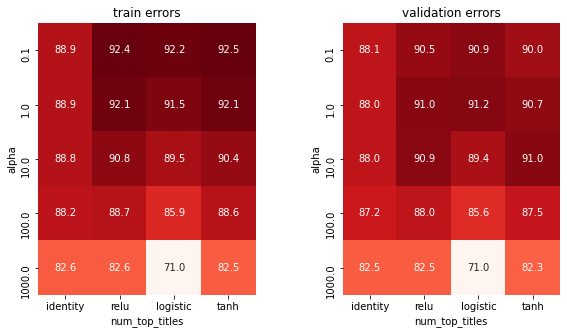

In [40]:
# Visualize by heatmap
train_scrs_df = pd.DataFrame(data=np.array(train_scores).reshape(len(alphas), -1), 
                             index=alphas, columns=activators)
val_scrs_df = pd.DataFrame(data=np.array(val_scores).reshape(len(alphas), -1),
                           index=alphas, columns=activators)
min_scr = min(min(train_scores), min(val_scores))
max_scr = max(max(train_scores), max(val_scores))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_scrs_df, vmin=min_scr, vmax=max_scr, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('train errors'); plt.xlabel('num_top_titles'); plt.ylabel('alpha')
plt.subplot(1, 2, 2)
sns.heatmap(val_scrs_df, vmin=min_scr, vmax=max_scr, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('validation errors'); plt.xlabel('num_top_titles'); plt.ylabel('alpha');

Mô hình NLP đã có sự cải thiện kết quả so với các mô hình trước

## Train và lưu model


In [41]:
model = full_pipeline.fit(X, y)

with open('model.ml', 'wb') as f:
    pickle.dump(model, f)

# Hướng phát triển tiếp theo
 Từ bài này, chúng ta có thể phát triển tiếp bằng cách đánh giá mức độ hiệu quả của việc đặt tiêu đề, cũng như mô tả dự án (trong bài này đã không đánh giá phần mô tả của mỗi dự án), sử dụng các kĩ thuật tốt hơn để nhận biết đâu là cách viết tiêu đề cũng như nội dung thu hút các nhà đầu tư.
 
 Ngoài ra còn có thể ứng dụng trong thực tế như: xây dựng bot Twitter, Discord tự động đăng bài về các dự án tiềm năng, xây dựng hệ thống gợi ý (recommend) những dự án phù hợp cho các nhà đầu tư 